# Demonstração - Algoritmo de Séries Temporais
---

Uma **_série temporal_** é uma série de pontos de dados indexados (ou listados ou representados graficamente) em ordem de tempo. A análise de séries temporais refere-se a métodos que extraem estatísticas significativas de dados de séries temporais. Isso é comumente usado para previsão e outros modelos.

<br>

**Objetivos de aprendizado**

---
*    Compreender os usos da Análise de Séries Temporais e aplicar o modelo de suavização esponencial para analise das vendas de champagne.

## Série

---




In [4]:
# Vamos importar algumas bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Vamos importar nosso arquivo csv com os dados
# Lembre-se: O arquivo csv deve estar no colab

file = '/content/Life Expectancy Brazil.xlsx'
df = pd.read_excel(file, parse_dates = True)
df.head

<bound method NDFrame.head of       País   Ano  Expectativa de vida (em anos)
0   Brasil  1960                      54.205463
1   Brasil  1961                      54.718707
2   Brasil  1962                      55.235659
3   Brasil  1963                      55.751390
4   Brasil  1964                      56.262951
5   Brasil  1965                      56.767366
6   Brasil  1966                      57.265683
7   Brasil  1967                      57.757927
8   Brasil  1968                      58.240683
9   Brasil  1969                      58.708024
10  Brasil  1970                      59.150585
11  Brasil  1971                      59.558000
12  Brasil  1972                      59.924805
13  Brasil  1973                      60.251512
14  Brasil  1974                      60.541098
15  Brasil  1975                      60.800512
16  Brasil  1976                      61.039122
17  Brasil  1977                      61.270829
18  Brasil  1978                      61.506463
19  Brasil

In [26]:
df["Ano"] = df.Ano.astype(str)
df.dtypes

Ano                               object
Expectativa de vida (em anos)    float64
dtype: object

In [15]:
df.drop(["País"], axis=1, inplace=True)

In [27]:
# Checar as informações do dataframe
# 105 linhas por 2 colunas (variáveis) sem valores ausentes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ano                            56 non-null     object 
 1   Expectativa de vida (em anos)  56 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [28]:
# Algumas informações estatísticas sobre as vendas

df.describe()

,Expectativa de vida (em anos)
count,56.000000
mean,64.983395
std,6.011508
min,54.205463
25%,60.468701
50%,64.422024
75%,70.556018
max,74.675878


Text(0, 0.5, 'Expectativa de vida (em anos)')

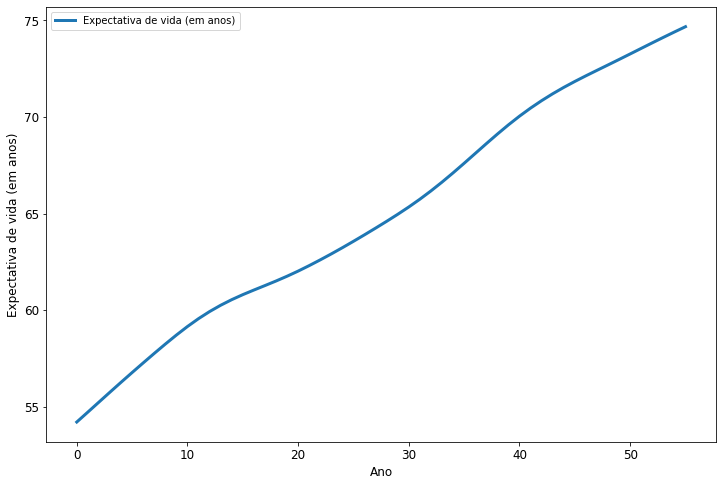

In [29]:
# Podemos traçar um gráfico de linhas com os dados para analisar algumas características

df.plot(figsize = (12,8), linewidth = 3, fontsize = 12)
#plt.title('Vendas anuais de champanhe',fontsize = 25)
plt.xlabel('Ano', fontsize = 12)
plt.ylabel('Expectativa de vida (em anos)', fontsize = 12)

# Podemos ver que nossos dados têm tendência - a cada ano as vendas aumentam -
#e uma sasonalidade - comportamento repetitivo (veja os picos).
#Lembre-se: esta é apenas uma observação visual, para uma melhor análise, 
#precisamos ver mais do que apenas este gráfico!

In [ ]:
# Vamos importar nosso arquivo csv novamente, mas agora usando o parâmetro 
#parse_dates que transforma nosso recurso Month em um datetime.
# Precisamos usar o parâmetro 'squeeze' como True para importar nossos dados como uma série de pandas

series = pd.read_csv(file, parse_dates =['Month'],index_col=0, squeeze=True)

# Veja agora o recurso 'Month' é do tipo datetime
series.head()

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Sales, dtype: int64

## Decomposição

---


Você pode pensar em uma série temporal como sendo composta por componentes de tendência, sazonalidade e resíduos. Essa pode ser uma boa maneira de pensar nos dados quando você for modelá-los. Se você conhece o período da série temporal, pode decompô-la nesses componentes. 

Neste exercício você irá decompor uma série temporal mostrando as vendas mensais de champanhe. Isso lhe dará uma imagem mais clara da tendência e do ciclo sazonal. Como os dados são mensais, você adivinhará que a sazonalidade pode ser de 12 períodos, mas isso nem sempre será o caso.

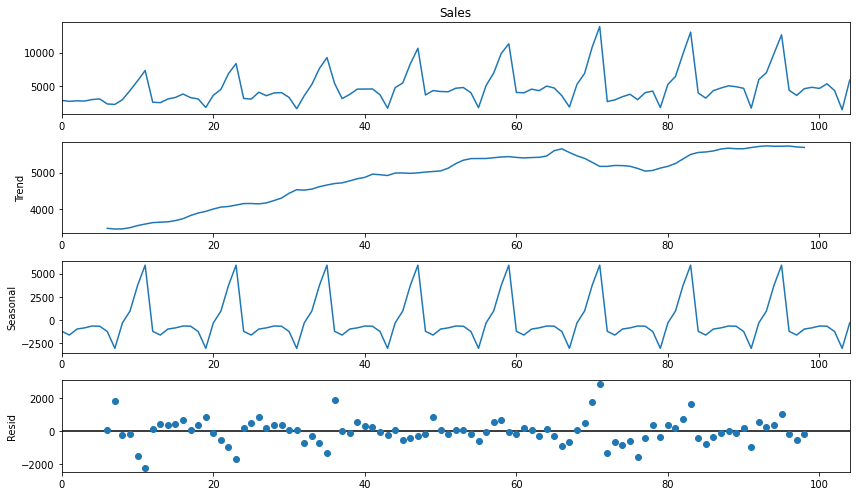

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df['Sales'], period=12)

# Plot decomposition
fig = decomp.plot();
fig.set_size_inches((12, 7))
plt.tight_layout();

## Autocorrelação

---

Neste exercício, você usará o ACF e o PACF para testar a sazonalidade desses dados. Você pode ver no gráfico acima que a série temporal não é estacionária, então você provavelmente deve evitar isso. Pode-se diminuir a tendência subtraindo a média móvel.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


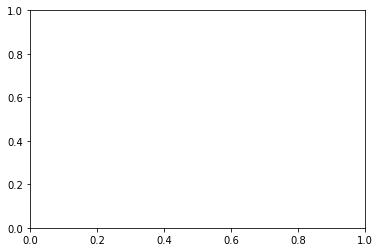

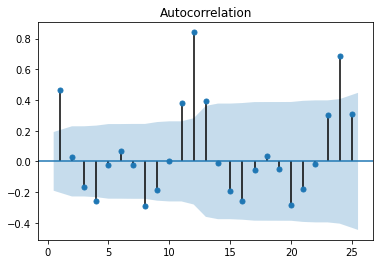

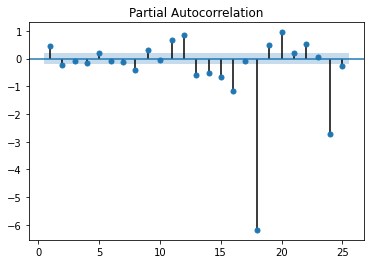

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(df['Sales'], lags=25, zero=False);
plot_pacf(df['Sales'], lags=25, zero=False);

## Suavização Exponencial

---



A suavização exponencial simples é usada para previsão de séries temporais quando os dados particularmente não possuem:

*   Tendência: uma inclinação para cima ou para baixo;
*   Sazonalidade: mostra um padrão específico devido a fatores sazonais, como horas, dias, ano etc.

Neste método uma previsão é uma soma ponderada das observações anteriores, mas o modelo usa explicitamente um peso exponencialmente decrescente para as observações anteriores. Possui um parâmetro de suavização que é conhecido como α que podem estar entre 0 e 1. 

*   α=0: Significa que a previsão para o valor futuro é a média dos dados históricos.
*   α=1: Significa que a previsão para todos os valores futuros é o valor da última observação.



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib

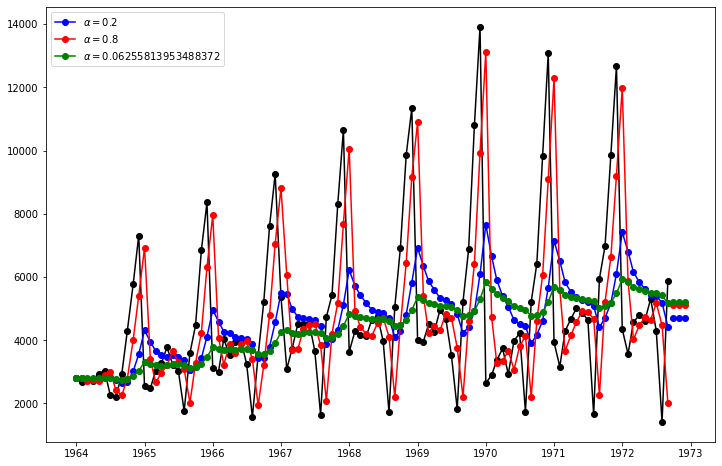

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

#Aqui vamos criar três ajustes nos quais tomaremos três valores diferentes 
#de alpha (valores do nível de suavização): 0.2; 0.8 e valor otimizado 
#automaticamente pelo statsmodel que é o recomendado.

fit1 = SimpleExpSmoothing(series).fit(
    smoothing_level=0.2, optimized=False);
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$");

fit2 = SimpleExpSmoothing(series).fit(
    smoothing_level=0.8, optimized=False);
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.8$");

fit3 = SimpleExpSmoothing(series).fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(12, 8));
plt.plot(series, marker="o", color="black");

plt.plot(fit1.fittedvalues, marker="o", color="blue");
(line1,) = plt.plot(fcast1, marker="o", color="blue");

plt.plot(fit2.fittedvalues, marker="o", color="red");
(line2,) = plt.plot(fcast2, marker="o", color="red");

plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")

plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])